In [2]:
import czifile
from skimage import io,feature,filters
import matplotlib.pyplot as plt
import numpy as np

img = czifile.imread('C:/Users/juanr/Documents/mediciones_ZEISS/22x16/22x16-Stitching.czi')
img.shape
#1 canal= monocromatico, 27054 filas x 26811 columnas = (x,y)

(1, 1, 1, 27783, 37746, 1)

In [3]:
type(img)

numpy.ndarray

In [4]:
#agarramos el canal monocromático, los (x,y) de la matriz
img = img[0,0,0,:,:,0]
img.shape

(27783, 37746)

In [5]:
def normalize(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)

img = normalize(img);

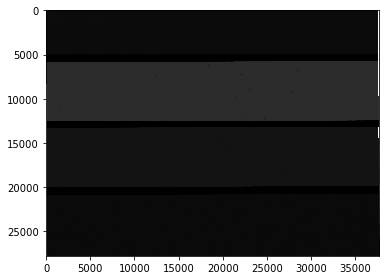

In [6]:
io.imshow(img,cmap='gray')

(array([6.2132702e+07, 3.4066550e+06, 4.8068800e+05, 2.3402700e+05,
        1.5933300e+05, 1.2297900e+05, 1.0222500e+05, 9.1349000e+04,
        8.5988000e+04, 7.8509000e+04, 7.5201000e+04, 7.2949000e+04,
        7.1015000e+04, 7.1737000e+04, 7.0868000e+04, 7.4573000e+04,
        8.2529000e+04, 9.6058000e+04, 1.3595200e+05, 2.9759200e+05,
        7.6110100e+05, 8.6419720e+06, 6.8081894e+07, 8.8818658e+07,
        6.7604720e+07, 3.4309500e+06, 2.7510000e+04, 2.8264000e+04,
        3.1583000e+04, 3.5018000e+04, 4.0945000e+04, 4.8140000e+04,
        5.9122000e+04, 7.9111000e+04, 1.1352600e+05, 1.7546200e+05,
        3.4028200e+05, 1.0300790e+06, 8.5284340e+06, 4.7344321e+07,
        9.0532523e+07, 3.5938664e+07, 1.2374290e+06, 8.1140000e+03,
        6.7070000e+03, 6.7650000e+03, 6.9580000e+03, 6.9780000e+03,
        7.2030000e+03, 7.1270000e+03, 7.3690000e+03, 7.4930000e+03,
        7.5730000e+03, 7.8840000e+03, 7.9270000e+03, 8.2760000e+03,
        8.3080000e+03, 8.5000000e+03, 8.7810000e

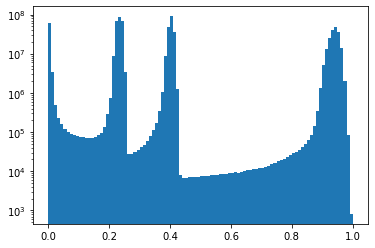

In [7]:
plt.hist(img.flatten(),bins=100,log=True)

C:\Users\juanr\Anaconda3\envs\defects\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


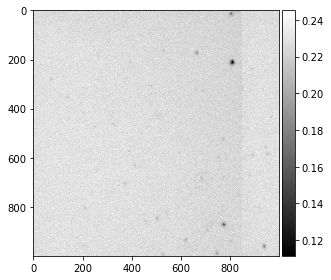

In [6]:
banda0= img[0:1000,0:1000]
io.imshow(banda0,cmap='gray')

In [ ]:
from math import sqrt
from skimage import data,io
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

def normalize(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)


image = banda0
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=15, num_sigma=1, threshold=.001)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=15, threshold=.01)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=15, threshold=.00001)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

C:\Users\juanr\Anaconda3\envs\defects\lib\site-packages\skimage\feature\blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
C:\Users\juanr\Anaconda3\envs\defects\lib\site-packages\skimage\feature\blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
C:\Users\juanr\Anaconda3\envs\defects\lib\site-packages\skimage\feature\blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
C:\Users\juanr\Anaconda3\envs\defects\lib\site-packages\skimage\feature\blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


In [ ]:
#creamos fuentes en los defectos
#el mapa nos dice qué tan lejos está cada punto de los bordes de los defectos

from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(~edges)
skimage.io.imshow(dt);

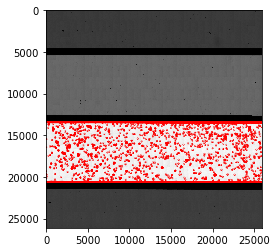

In [8]:
plt.imshow(img,cmap='gray')
plt.contour(img>0.8,colors='r') #busca bordes
plt.show()



In [ ]:
#1 chequeo threshold para cada banda
#2 label(threshold) --> measures.label
#3 for region in regionprops(labeled):
#    areas.append(region.area), area o lo que sea, diametro etc

